In [1]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import sys

main_dir = "C:/Users/Aruay/Desktop/ra application/project/"

data = pd.read_csv(main_dir+'dataset/featureEmodb_Ek_new.csv')

#data = pd.read_csv('../ravdes/featureEmodb_Ek.csv')

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,emo,speaker
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966,0,6,3
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522,0,3,3
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692,0,1,3
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109,0,6,3
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-255.980286,105.676674,-42.180950,75.896423,-23.686800,10.384299,-17.101816,-5.522916,-3.057154,-10.192598,...,56.598065,0.013773,-0.044897,0.036112,-0.103853,0.014030,0.004264,1,2,16
531,-246.298492,91.399818,-25.200518,57.381245,-6.517654,19.359470,-4.424452,-3.416811,2.381373,-6.032308,...,56.940429,0.022640,0.051658,0.111283,0.034628,0.032623,-0.023948,1,7,16
532,-287.566315,88.560669,-21.810999,60.376926,-0.650359,19.902147,-0.450192,2.266046,3.220632,-6.157897,...,56.867307,0.064417,0.045792,-0.014448,0.036817,-0.002728,-0.039342,1,7,16
533,-329.608124,67.631531,-87.368507,64.361099,-49.395180,-1.466112,-20.686680,-10.990952,-6.811410,-28.455215,...,53.589258,0.004312,0.004346,-0.046711,-0.008183,-0.011669,0.014701,1,1,16


In [3]:
import joblib

# Load the saved scaler
scaler = joblib.load(main_dir + "scaler.pkl")

# Load the saved model
gender_model = tf.keras.models.load_model(main_dir + "gender_classification_model.h5")

In [4]:
# Keep only the first 193 columns
X_gender = data.iloc[:, :193].values

# Standardize features
X_scaled = scaler.transform(X_gender)

# Predict genders
gender_predictions = gender_model.predict(X_scaled)

17/17 [==============================] - 0s 3ms/step


In [5]:
print(gender_predictions)

[[5.3914841e-02]
 [2.7344990e-04]
 [2.8685003e-03]
 [5.4774457e-03]
 [3.7811184e-04]
 [1.0176876e-03]
 [4.2065262e-04]
 [5.4871949e-04]
 [6.4877611e-01]
 [3.4983151e-03]
 [1.2081929e-03]
 [6.5318710e-04]
 [1.7036605e-03]
 [3.1155697e-03]
 [2.2163147e-02]
 [9.7968860e-04]
 [8.3286525e-04]
 [1.1550989e-03]
 [1.0704088e-03]
 [9.9626166e-01]
 [4.2972350e-04]
 [4.3027862e-03]
 [2.1547864e-01]
 [2.5862953e-04]
 [2.3637460e-04]
 [1.8480223e-03]
 [1.0041273e-03]
 [6.6287938e-04]
 [1.1812864e-03]
 [3.2756152e-04]
 [4.8196479e-04]
 [1.1076912e-02]
 [1.6184397e-03]
 [7.2550477e-04]
 [1.2340237e-02]
 [2.8029407e-04]
 [6.6080788e-04]
 [8.5476867e-04]
 [3.7037355e-03]
 [1.6264275e-03]
 [4.0304218e-04]
 [1.4188240e-03]
 [5.0482724e-04]
 [1.3442766e-02]
 [9.8911917e-04]
 [2.2824713e-04]
 [1.3678925e-03]
 [9.5574238e-04]
 [3.3694410e-03]
 [9.9811941e-01]
 [9.9871039e-01]
 [9.9928093e-01]
 [9.9837577e-01]
 [9.9949455e-01]
 [9.9489617e-01]
 [9.9989474e-01]
 [9.9954426e-01]
 [9.9913985e-01]
 [9.9765438e-0

In [25]:
male_rows = gender_predictions.flatten() < 0.5  # 0 for Male, 1 for Female

df = data[male_rows]

print(f"Filtered dataset contains {df.shape[0]} male samples.")

Filtered dataset contains 230 male samples.


In [26]:
df.shape

(230, 196)

In [27]:
df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,emo,speaker
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966,0,6,3
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522,0,3,3
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692,0,1,3
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109,0,6,3
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,-225.323318,107.318222,-54.203751,61.598076,-17.419870,20.989830,-25.045155,-0.421352,-10.304119,-16.766657,...,59.455596,-0.051994,-0.003146,-0.015737,-0.099566,-0.004473,-0.001898,0,5,15
460,-222.813461,140.969894,-22.877916,74.755981,-2.012127,25.562910,-2.754688,7.205434,-4.086431,-10.144965,...,55.796552,-0.009773,0.033598,0.096730,-0.038887,-0.009875,0.013777,0,2,15
461,-226.837311,142.118576,-28.414316,80.523026,1.455291,23.349869,0.228496,8.992689,-1.293387,-8.069052,...,55.246181,0.053525,0.008467,-0.028974,0.005422,-0.001764,0.008940,0,3,15
462,-230.787430,144.326324,-33.574013,81.690323,2.609222,19.189894,-1.268384,1.757590,-5.874588,-8.334718,...,54.868097,0.011599,0.028150,0.043454,-0.076144,-0.029873,-0.009483,0,3,15


In [28]:
data.iloc[:,-3] == 0 #male

0       True
1       True
2       True
3       True
4       True
       ...  
530    False
531    False
532    False
533    False
534    False
Name: gender, Length: 535, dtype: bool

In [29]:
X_speaker = df.iloc[:, -1].copy()
X = df.iloc[:, :-3].copy()
y = df.iloc[:,-2].copy()

In [30]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,14.751010,17.490223,16.878034,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,14.512919,17.550766,19.076122,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,16.131910,18.237524,19.299087,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,15.816742,17.617843,17.377833,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,14.601713,14.795569,19.625183,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,-225.323318,107.318222,-54.203751,61.598076,-17.419870,20.989830,-25.045155,-0.421352,-10.304119,-16.766657,...,15.536835,17.508150,18.547842,59.455596,-0.051994,-0.003146,-0.015737,-0.099566,-0.004473,-0.001898
460,-222.813461,140.969894,-22.877916,74.755981,-2.012127,25.562910,-2.754688,7.205434,-4.086431,-10.144965,...,14.436168,16.692528,19.409147,55.796552,-0.009773,0.033598,0.096730,-0.038887,-0.009875,0.013777
461,-226.837311,142.118576,-28.414316,80.523026,1.455291,23.349869,0.228496,8.992689,-1.293387,-8.069052,...,14.510448,16.331833,19.702384,55.246181,0.053525,0.008467,-0.028974,0.005422,-0.001764,0.008940
462,-230.787430,144.326324,-33.574013,81.690323,2.609222,19.189894,-1.268384,1.757590,-5.874588,-8.334718,...,14.435822,15.998726,21.182246,54.868097,0.011599,0.028150,0.043454,-0.076144,-0.029873,-0.009483


In [31]:
y

0      6
1      3
2      1
3      6
4      3
      ..
459    5
460    2
461    3
462    3
463    1
Name: emo, Length: 230, dtype: int64

In [32]:
X_speaker

0       3
1       3
2       3
3       3
4       3
       ..
459    15
460    15
461    15
462    15
463    15
Name: speaker, Length: 230, dtype: int64

In [33]:
X.shape, y.shape

((230, 193), (230,))

In [34]:
from sklearn.utils import shuffle

X, y, X_speaker = shuffle(X, y, X_speaker, random_state=42)

In [36]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
451,-249.337189,91.015137,-59.157516,42.911716,-48.376877,22.672216,-13.814055,-5.964365,-10.074743,-16.622065,...,17.420453,18.031832,18.972717,58.745778,-0.001685,-0.010163,-0.041556,0.005958,0.017326,-0.001483
170,-264.980194,103.706055,-64.245041,38.900986,-29.405767,23.437378,-7.302765,9.834015,-5.802924,-9.845560,...,15.097606,16.060623,17.292747,57.686271,0.002955,0.010184,-0.034661,-0.008299,0.008458,-0.007884
10,-278.220978,154.591141,-21.518656,56.616154,-13.965269,14.983048,-2.102453,-13.195439,-4.405796,-0.891920,...,15.724136,16.737922,20.563591,53.525882,0.020785,-0.044109,-0.082349,-0.167564,0.027870,0.048865
427,-248.555435,98.241814,-45.223652,54.167076,-20.033934,13.043393,-20.918383,-4.915001,-17.708731,-13.452534,...,17.264757,18.203340,19.146769,58.984734,0.026480,0.000422,0.006179,0.034216,0.007604,-0.009208
16,-240.981644,130.688934,-23.032187,60.210289,-4.573569,13.074435,-9.911800,-5.638669,-13.477088,-10.075967,...,15.878173,16.246252,18.123892,56.054015,0.006552,0.004910,-0.029473,0.010414,0.002722,0.013832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,-255.694687,125.247299,-4.430037,54.496006,-5.908419,17.290602,-14.493864,-7.522255,-5.406120,-10.232793,...,16.358619,16.869920,18.106354,54.956864,-0.084279,-0.026536,-0.003877,-0.079395,0.032545,-0.033576
15,-251.700806,108.045067,-32.954029,56.045170,-18.849281,17.657915,-19.965820,-2.117244,-7.571694,-16.578705,...,16.280043,16.811897,16.726842,56.870287,-0.004876,-0.009968,-0.023945,0.013597,-0.000006,0.007349
197,-269.675293,141.149551,-13.567772,60.094101,-0.742236,29.263628,11.964806,3.630230,1.648132,-10.404927,...,14.335093,15.818737,18.072020,52.927623,0.022473,-0.058661,-0.065982,-0.043503,0.000863,0.043847
413,-232.295563,111.404900,-39.206280,50.869785,-14.307878,15.146712,-6.797171,-2.677145,-8.112752,-13.977810,...,15.202279,17.130587,18.996226,56.799487,-0.006414,-0.006828,-0.045594,-0.005368,-0.016053,0.014134


In [35]:
X_speaker

451    15
170    10
10      3
427    15
16      3
       ..
211    11
15      3
197    11
413    15
207    11
Name: speaker, Length: 230, dtype: int64

In [37]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [38]:
y1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [39]:
X.shape, y1.shape

((230, 193), (230, 7))

In [40]:
X2_speaker = X_speaker.copy().to_numpy()
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [41]:
X2.shape, X2_speaker.shape, y2.shape

((230, 193), (230,), (230,))

In [42]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM

from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [43]:
import random, numpy as np
from keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [44]:
X3=pd.DataFrame(X2)
X3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-249.337189,91.015137,-59.157516,42.911716,-48.376877,22.672216,-13.814055,-5.964365,-10.074743,-16.622065,...,17.420453,18.031832,18.972717,58.745778,-0.001685,-0.010163,-0.041556,0.005958,0.017326,-0.001483
1,-264.980194,103.706055,-64.245041,38.900986,-29.405767,23.437378,-7.302765,9.834015,-5.802924,-9.845560,...,15.097606,16.060623,17.292747,57.686271,0.002955,0.010184,-0.034661,-0.008299,0.008458,-0.007884
2,-278.220978,154.591141,-21.518656,56.616154,-13.965269,14.983048,-2.102453,-13.195439,-4.405796,-0.891920,...,15.724136,16.737922,20.563591,53.525882,0.020785,-0.044109,-0.082349,-0.167564,0.027870,0.048865
3,-248.555435,98.241814,-45.223652,54.167076,-20.033934,13.043393,-20.918383,-4.915001,-17.708731,-13.452534,...,17.264757,18.203340,19.146769,58.984734,0.026480,0.000422,0.006179,0.034216,0.007604,-0.009208
4,-240.981644,130.688934,-23.032187,60.210289,-4.573569,13.074435,-9.911800,-5.638669,-13.477088,-10.075967,...,15.878173,16.246252,18.123892,56.054015,0.006552,0.004910,-0.029473,0.010414,0.002722,0.013832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,-255.694687,125.247299,-4.430037,54.496006,-5.908419,17.290602,-14.493864,-7.522255,-5.406120,-10.232793,...,16.358619,16.869920,18.106354,54.956864,-0.084279,-0.026536,-0.003877,-0.079395,0.032545,-0.033576
226,-251.700806,108.045067,-32.954029,56.045170,-18.849281,17.657915,-19.965820,-2.117244,-7.571694,-16.578705,...,16.280043,16.811897,16.726842,56.870287,-0.004876,-0.009968,-0.023945,0.013597,-0.000006,0.007349
227,-269.675293,141.149551,-13.567772,60.094101,-0.742236,29.263628,11.964806,3.630230,1.648132,-10.404927,...,14.335093,15.818737,18.072020,52.927623,0.022473,-0.058661,-0.065982,-0.043503,0.000863,0.043847
228,-232.295563,111.404900,-39.206280,50.869785,-14.307878,15.146712,-6.797171,-2.677145,-8.112752,-13.977810,...,15.202279,17.130587,18.996226,56.799487,-0.006414,-0.006828,-0.045594,-0.005368,-0.016053,0.014134


In [45]:
X3_speaker = pd.DataFrame(X2_speaker)
X3_speaker

,0
0,15
1,10
2,3
3,15
4,3
...,...
225,11
226,3
227,11
228,15


In [46]:
speakers = X_speaker.unique()
speakers

array([15, 10,  3, 12, 11, 14], dtype=int64)

In [48]:
X3_col = X3_speaker.rename(columns={0: 'speaker'})
X3_col

,speaker
0,15
1,10
2,3
3,15
4,3
...,...
225,11
226,3
227,11
228,15


In [49]:
X_combined = pd.concat([X3, X3_col], axis=1)
X_combined

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,speaker
0,-249.337189,91.015137,-59.157516,42.911716,-48.376877,22.672216,-13.814055,-5.964365,-10.074743,-16.622065,...,18.031832,18.972717,58.745778,-0.001685,-0.010163,-0.041556,0.005958,0.017326,-0.001483,15
1,-264.980194,103.706055,-64.245041,38.900986,-29.405767,23.437378,-7.302765,9.834015,-5.802924,-9.845560,...,16.060623,17.292747,57.686271,0.002955,0.010184,-0.034661,-0.008299,0.008458,-0.007884,10
2,-278.220978,154.591141,-21.518656,56.616154,-13.965269,14.983048,-2.102453,-13.195439,-4.405796,-0.891920,...,16.737922,20.563591,53.525882,0.020785,-0.044109,-0.082349,-0.167564,0.027870,0.048865,3
3,-248.555435,98.241814,-45.223652,54.167076,-20.033934,13.043393,-20.918383,-4.915001,-17.708731,-13.452534,...,18.203340,19.146769,58.984734,0.026480,0.000422,0.006179,0.034216,0.007604,-0.009208,15
4,-240.981644,130.688934,-23.032187,60.210289,-4.573569,13.074435,-9.911800,-5.638669,-13.477088,-10.075967,...,16.246252,18.123892,56.054015,0.006552,0.004910,-0.029473,0.010414,0.002722,0.013832,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,-255.694687,125.247299,-4.430037,54.496006,-5.908419,17.290602,-14.493864,-7.522255,-5.406120,-10.232793,...,16.869920,18.106354,54.956864,-0.084279,-0.026536,-0.003877,-0.079395,0.032545,-0.033576,11
226,-251.700806,108.045067,-32.954029,56.045170,-18.849281,17.657915,-19.965820,-2.117244,-7.571694,-16.578705,...,16.811897,16.726842,56.870287,-0.004876,-0.009968,-0.023945,0.013597,-0.000006,0.007349,3
227,-269.675293,141.149551,-13.567772,60.094101,-0.742236,29.263628,11.964806,3.630230,1.648132,-10.404927,...,15.818737,18.072020,52.927623,0.022473,-0.058661,-0.065982,-0.043503,0.000863,0.043847,11
228,-232.295563,111.404900,-39.206280,50.869785,-14.307878,15.146712,-6.797171,-2.677145,-8.112752,-13.977810,...,17.130587,18.996226,56.799487,-0.006414,-0.006828,-0.045594,-0.005368,-0.016053,0.014134,15


In [67]:
# Get top 5 speakers with the most data

speaker_counts = X_combined['speaker'].value_counts()
selected_speakers = speaker_counts.head(5).index.to_numpy()

print("Selected speakers:", selected_speakers)

Selected speakers: [15 11  3 10 12]


In [68]:
from skfeature.function.similarity_based import fisher_score

hist=[]
scores=[]
totalsize=230
num_fea=125
a=create_index(kfold,totalsize)

for i in range (kfold):
    model_name = 'Model_'+str(i)
    savedir='Emodb_speaker_male'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    # Choose one test speaker from selected_speakers
    test_speaker = selected_speakers[i]

    # Use only speakers not in selected_speakers as training
    train_speakers = np.setdiff1d(speakers, [test_speaker])

    print(f"Fold {i+1}")
    print("Test speaker:", test_speaker)
    print("Train speakers:", train_speakers)

    # Get the indices for test and train
    train_indices = X_combined[X_combined['speaker'].isin(train_speakers)].index
    test_indices = X_combined[X_combined['speaker'] == test_speaker].index


    # Sanity check for overlaps
    overlap_indices = np.intersect1d(train_indices, test_indices)
    if len(overlap_indices) > 0:
        print(f"Overlap found in fold {i}! Overlapping indices: {overlap_indices}")
    else:
        print(f"No overlap in fold {i}.")

    
    # Prepare training and testing sets
    X_train = X_combined.drop(columns=['speaker']).iloc[train_indices, :]
    y_train = y1[train_indices, :]
    y_fs_train = y.iloc[train_indices]

    X_test = X_combined.drop(columns=['speaker']).iloc[test_indices, :]
    y_test = y1[test_indices, :]


    # fisher score
    X_fs = X_train.copy().to_numpy()
    X_test_fs = X_test.copy().to_numpy()
    y_fs = y_fs_train.copy().to_numpy()

    score  = fisher_score.fisher_score(X_fs, y_fs)
    sorted_indices = np.argsort(score)[::-1]
    fs_indices = sorted_indices[:num_fea]

    print("Selected FS indices:", fs_indices)
    
    selected_features_train = X_fs[:,fs_indices]
    selected_features_test = X_test_fs[:,fs_indices]

    X_train_s = pd.DataFrame(selected_features_train)
    X_test_s = pd.DataFrame(selected_features_test)

    x_traincnn =np.expand_dims(X_train_s, axis=2)
    x_testcnn= np.expand_dims(X_test_s, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)


    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)

    hist.append(m1.fit(x_traincnn, y_train, batch_size=32, epochs=700, validation_data=(x_testcnn, y_test), callbacks=[early_stopping]))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))

    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)

Fold 1
Test speaker: 15
Train speakers: [ 3 10 11 12 14]
No overlap in fold 0.
Selected FS indices: [120   1   0  13  10  21  15  85  68  25  82   8 168  26  55  77  35  76
  34  47 154 173 165  67 115  59  42  33  58  24   7  22   2  18   9   4
   6   3  16   5 159 162 157 134 135 143  94  29  41  78 131 161 185 107
 104  17  12  39  19 128 106 113 121 132  70  66 117 160 140 169 174 130
  95 150 183 176 177 181 187 178 171 180 184 166 144 151 105  49  46 118
  32  40  28  72 126  69 109 145 102 129 148  74  87  91 103  52  27  51
  84 122 152 139 124  86  83 111 125 100  88 114  80  61 136 108  64]
0
Epoch 1/700
6/6 [==============================] - 3s 152ms/step - loss: 2.0473 - accuracy: 0.2126 - val_loss: 1.8958 - val_accuracy: 0.2679
Epoch 2/700
6/6 [==============================] - 1s 95ms/step - loss: 1.8222 - accuracy: 0.3448 - val_loss: 1.8126 - val_accuracy: 0.2857
Epoch 3/700
6/6 [==============================] - 1s 108ms/step - loss: 1.7090 - accuracy: 0.3218 - val_loss

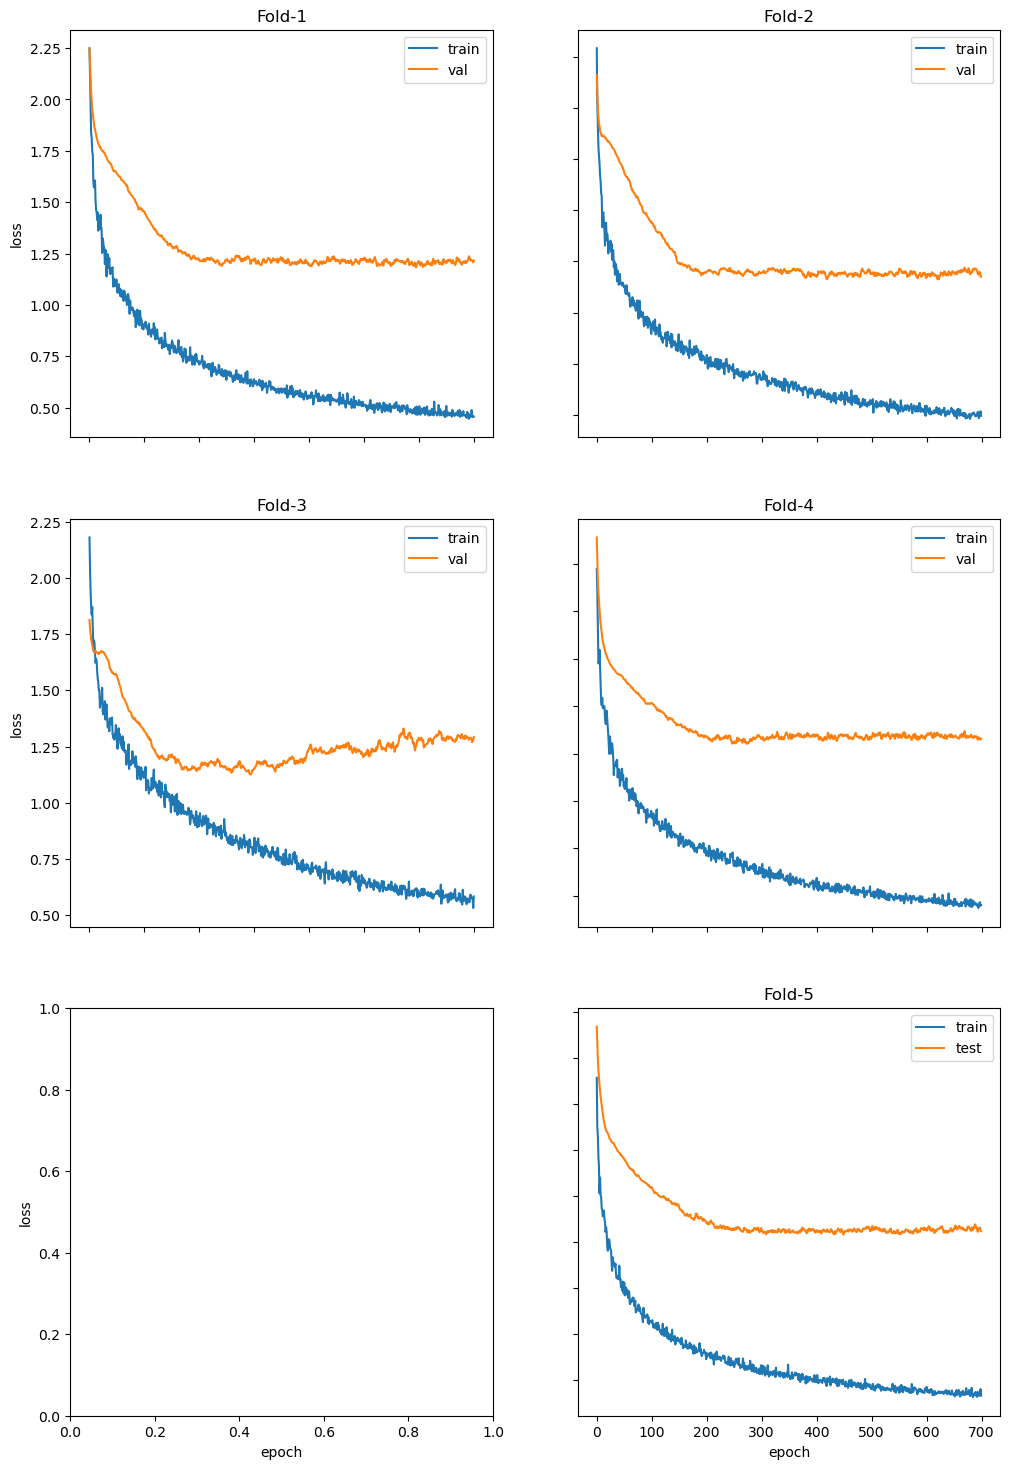

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'val'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'val'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'val'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'val'], loc='upper right')

axs[2, 1].plot(hist[4].history['loss'])
axs[2, 1].plot(hist[4].history['val_loss'])
axs[2, 1].set_title('Fold-5')
axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('emodbFemale_4Folds_65.png')

In [77]:
# loading json and creating model
from keras.models import model_from_json
savedir='Emodb_speaker_male'
m='Model_4'

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir + '/' + m + '.h5')
print("Loaded model from disk")

Loaded model from disk


In [78]:
import numpy as np
import tensorflow as tf
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X4.npy')
yloaded=np.load(savedir+'/y4.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 71.43%


Fold 0: 66.07%

Fold 1: 65.45%

Fold 2: 55.32%

Fold 3: 69.44%

Fold 4: 71.43%

In [79]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

2/2 [==============================] - 0s 5ms/step
(35, 7)
35


array([[12,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  1,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  1,  0,  5,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  4]], dtype=int64)

In [80]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 7):
    sumik = np.sum(array[it])
    for it2 in range(0, 7):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[100.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.   80.    0.   20.    0.    0. ]
 [ 25.    0.   75.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.   50.   50. ]
 [  0.    0.   16.7   0.   83.3   0.    0. ]
 [ 50.    0.    0.    0.    0.   50.    0. ]
 [  0.    0.    0.    0.    0.    0.  100. ]]


         angry  bored  neutral  disgust  fear  happy    sad
angry    100.0    0.0      0.0      0.0   0.0    0.0    0.0
bored      0.0    0.0     80.0      0.0  20.0    0.0    0.0
neutral   25.0    0.0     75.0      0.0   0.0    0.0    0.0
disgust    0.0    0.0      0.0      0.0   0.0   50.0   50.0
fear       0.0    0.0     16.7      0.0  83.3    0.0    0.0
happy     50.0    0.0      0.0      0.0   0.0   50.0    0.0
sad        0.0    0.0      0.0      0.0   0.0    0.0  100.0



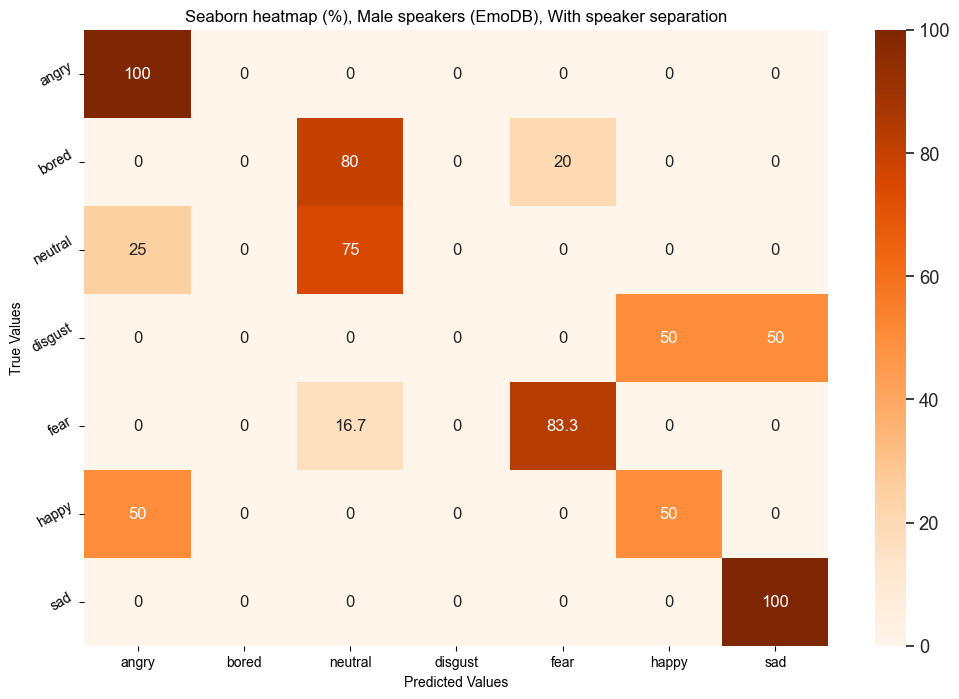

In [81]:
listik = ['angry', 'bored', 'neutral', 'disgust', 'fear', 'happy', 'sad']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%), Male speakers (EmoDB), With speaker separation')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()